In [1]:
#Importing what we need
#remember to run this cell twice

%matplotlib notebook
import matplotlib.pyplot as plt

import mygrad as mg
import numpy as np
import os
import cv2
import glob


In [2]:
#load database
path_to_train = "fruits-360/Training"
path_to_test = "fruits-360/Test"
Classes = []
for file in os.listdir(path_to_train):
    Classes.append(file)
# print(Classes)
print(len(Classes))

132


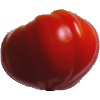

In [27]:
from PIL import Image

im = Image.open("fruits-360/Training/Tomato 3/193_100.jpg") # Can be many different formats.
im
# pix = np.array(im.getdata()).reshape(im.size[0], im.size[1], 3)
# pix

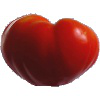

In [31]:
test_im = Image.open("fruits-360/Test/Tomato 3/23_100.jpg")
test_im

In [4]:
for files in os.scandir(path_to_train):
    print(files)

<DirEntry 'Tomato 4'>
<DirEntry 'Apple Red Delicious'>
<DirEntry 'Tomato 3'>
<DirEntry 'Huckleberry'>
<DirEntry 'Blueberry'>
<DirEntry 'Pear Red'>
<DirEntry 'Banana Lady Finger'>
<DirEntry 'Melon Piel de Sapo'>
<DirEntry 'Pear'>
<DirEntry 'Strawberry'>
<DirEntry 'Nut Forest'>
<DirEntry 'Avocado'>
<DirEntry 'Tomato 2'>
<DirEntry 'Pomegranate'>
<DirEntry 'Dates'>
<DirEntry 'Carambula'>
<DirEntry 'Apple Red'>
<DirEntry 'Potato Red Washed'>
<DirEntry '.DS_Store'>
<DirEntry 'Granadilla'>
<DirEntry 'Kohlrabi'>
<DirEntry 'Tamarillo'>
<DirEntry 'Pepper Red'>
<DirEntry 'Fig'>
<DirEntry 'Ginger Root'>
<DirEntry 'Kiwi'>
<DirEntry 'Cherry Wax Yellow'>
<DirEntry 'Lemon'>
<DirEntry 'Guava'>
<DirEntry 'Apple Golden 2'>
<DirEntry 'Pear Stone'>
<DirEntry 'Cauliflower'>
<DirEntry 'Mandarine'>
<DirEntry 'Quince'>
<DirEntry 'Strawberry Wedge'>
<DirEntry 'Pear Monster'>
<DirEntry 'Raspberry'>
<DirEntry 'Pitahaya Red'>
<DirEntry 'Nut Pecan'>
<DirEntry 'Apple Golden 3'>
<DirEntry 'Redcurrant'>
<DirEntry 'Pep

In [5]:
len("fruits-360/Training/")

20

In [7]:
fruit_images = []
labels = [] 
# for fruit_dir_path in glob.glob(path_to_train):
for fruit_dir_path in glob.glob("fruits-360/Training/*"):
    fruit_label = fruit_dir_path.split("/")[-1]
    print(fruit_label)
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        
        image = cv2.resize(image, (45, 45))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        fruit_images.append(image)
        labels.append(fruit_label)
fruit_images = np.array(fruit_images)
labels = np.array(labels)

Tomato 4
Apple Red Delicious
Tomato 3
Huckleberry
Blueberry
Pear Red
Banana Lady Finger
Melon Piel de Sapo
Pear
Strawberry
Nut Forest
Avocado
Tomato 2
Pomegranate
Dates
Carambula
Apple Red
Potato Red Washed
Granadilla
Kohlrabi
Tamarillo
Pepper Red
Fig
Ginger Root
Kiwi
Cherry Wax Yellow
Lemon
Guava
Apple Golden 2
Pear Stone
Cauliflower
Mandarine
Quince
Strawberry Wedge
Pear Monster
Raspberry
Pitahaya Red
Nut Pecan
Apple Golden 3
Redcurrant
Pepper Yellow
Grape Pink
Apple Golden
Banana Red
Cucumber Ripe 2
Physalis
Cherry Rainier
Maracuja
Chestnut
Plum
Potato Sweet
Cherry
Cucumber Ripe
Hazelnut
Nectarine
Cherry Wax Black
Cantaloupe 2
Lychee
Pepper Orange
Clementine
Watermelon
Pear Kaiser
Cantaloupe
Mangostan
Cherry 2
Pineapple Mini
Rambutan
Grape White
Tomato Yellow
Apple Braeburn
Tomato Maroon
Onion White
Onion Red Peeled
Mango
Potato White
Apple Crimson Snow
Potato Red
Corn Husk
Cocos
Mulberry
Avocado ripe
Passion Fruit
Apple Granny Smith
Beetroot
Kumquats
Grape White 2
Apricot
Eggplant


In [ ]:
print(fruit_images)

In [8]:
label_to_id_dict = {v:i for i,v in enumerate(np.unique(labels))}
id_to_label_dict = {v: k for k, v in label_to_id_dict.items()}

In [9]:
label_ids = np.array([label_to_id_dict[x] for x in labels])
print(label_ids)
fruit_images.shape, label_ids.shape, labels.shape

[123 123 123 ...  82  82  82]


((67692, 45, 45, 3), (67692,), (67692,))

In [10]:
test_fruit_images = []
test_labels = [] 
for fruit_dir_path in glob.glob("fruits-360/Test/*"):
    fruit_label = fruit_dir_path.split("/")[-1]
    print(fruit_label)
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        
        image = cv2.resize(image, (45, 45))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        test_fruit_images.append(image)
        test_labels.append(fruit_label)
test_fruit_images = np.array(test_fruit_images)
test_labels = np.array(test_labels)

Tomato 4
Apple Red Delicious
Tomato 3
Huckleberry
Blueberry
Pear Red
Banana Lady Finger
Melon Piel de Sapo
Pear
Strawberry
Nut Forest
Avocado
Tomato 2
Pomegranate
Dates
Carambula
Apple Red
Potato Red Washed
Granadilla
Kohlrabi
Tamarillo
Pepper Red
Fig
Ginger Root
Kiwi
Cherry Wax Yellow
Lemon
Guava
Apple Golden 2
Pear Stone
Cauliflower
Mandarine
Quince
Strawberry Wedge
Pear Monster
Raspberry
Pitahaya Red
Nut Pecan
Apple Golden 3
Redcurrant
Pepper Yellow
Grape Pink
Apple Golden
Banana Red
Cucumber Ripe 2
Physalis
Cherry Rainier
Maracuja
Chestnut
Plum
Potato Sweet
Cherry
Cucumber Ripe
Hazelnut
Nectarine
Cherry Wax Black
Cantaloupe 2
Lychee
Pepper Orange
Clementine
Watermelon
Pear Kaiser
Cantaloupe
Mangostan
Cherry 2
Pineapple Mini
Rambutan
Grape White
Tomato Yellow
Apple Braeburn
Tomato Maroon
Onion White
Onion Red Peeled
Mango
Potato White
Apple Crimson Snow
Potato Red
Corn Husk
Cocos
Mulberry
Avocado ripe
Passion Fruit
Apple Granny Smith
Beetroot
Kumquats
Grape White 2
Apricot
Eggplant


In [11]:
test_label_ids = np.array([label_to_id_dict[x] for x in test_labels])
test_fruit_images.shape, test_label_ids.shape


((22688, 45, 45, 3), (22688,))

In [12]:

fruit_images = fruit_images.reshape((67692, 6075))
test_fruit_images = test_fruit_images.reshape((22688, 6075))


In [13]:
fruit_images = fruit_images.astype(float)
test_fruit_images = test_fruit_images.astype(float)
fruit_images /= 255.0
test_fruit_images /= 255.0

In [14]:
from mynn.optimizers.adam import Adam
from mynn.initializers.he_normal import he_normal
from mynn.activations.relu import relu
from mynn.losses.cross_entropy import softmax_cross_entropy
from mynn.layers.dense import dense
from mynn.layers.dropout import dropout


# Define your MyNN-`Model` class here. It should have:
# - an `__init__` method that initializes all of your layers
# - a `__call__` method that defines the model's "forward pass"
# - a `parameters` property that returns a tuple of all of your
#   model's learnable parameters (refer to the Tendrils-MyNN)
#   notebook for the syntax of defining a class-property)


class Model:
    def __init__(self, n1, n2, num_classes):
        """
        Initializes a model with two hidden layers of size `n1` and `n2`
        respectively.
        
        Parameters
        ----------
        n1 : int
            The number of neurons in the first hidden layer

        n2 : int
            The number of neurons in the second hidden layer
        
        num_classes : int
            The number of classes predicted by the model"""
        # STUDENT CODE HERE
        self.dense1 = dense(6075, n1, weight_initializer = he_normal)
        self.dropout2 = dropout(prob_dropout=0.1)
        self.dense3 = dense(n1, n2, weight_initializer = he_normal)
        self.dropout4 = dropout(prob_dropout=0.1)
        self.dense5 = dense(n2, num_classes, weight_initializer = he_normal)
        
    def __call__(self, x):
        '''Passes data as input to our model, performing a "forward-pass".
        
        This allows us to conveniently initialize a model `m` and then send data through it
        to be classified by calling `m(x)`.
        
        Parameters
        ----------
        x : Union[numpy.ndarray, mygrad.Tensor], shape=(M, 2)
            A batch of data consisting of M pieces of data,
            each with a dimentionality of 2.
            
        Returns
        -------
        mygrad.Tensor, shape=(M, num_out)
            The model's prediction for each of the M pieces of data.
        '''
        
        # We pass our data through a dense layer, use the activation 
        # function relu and then pass it through our second dense layer,
        # then use the activation function relu and then pass it through
        # our third dense layer.
        # We don't have a second activation function because it happens
        # to be included in our loss function: softmax-crossentropy
#         return self.dense5(self.dropout4(relu(self.dense3(self.dropout2(relu(self.dense1(x)))))))
        return self.dense5(relu(self.dense3(relu(self.dense1(x)))))
        
    @property
    def parameters(self):
        """ A convenience function for getting all the parameters of our model.
        
        This can be accessed as an attribute, via `model.parameters` 
        
        Returns
        -------
        Tuple[Tensor, ...]
            A tuple containing all of the learnable parameters for our model"""
        return self.dense1.parameters + self.dropout2.parameters + self.dense3.parameters + self.dropout4.parameters + self.dense5.parameters

In [15]:
label_ids = label_ids.astype(int)
test_label_ids = test_label_ids.astype(int)

In [20]:
# STUDENT CODE HERE
# learning_rate = 0.001
weight_decay = 5e-4
n1 = 512
n2 = 256
# n3 = 128
model = Model(n1, n2, 132)
optim = Adam(model.parameters)

<IPython.core.display.Javascript object>


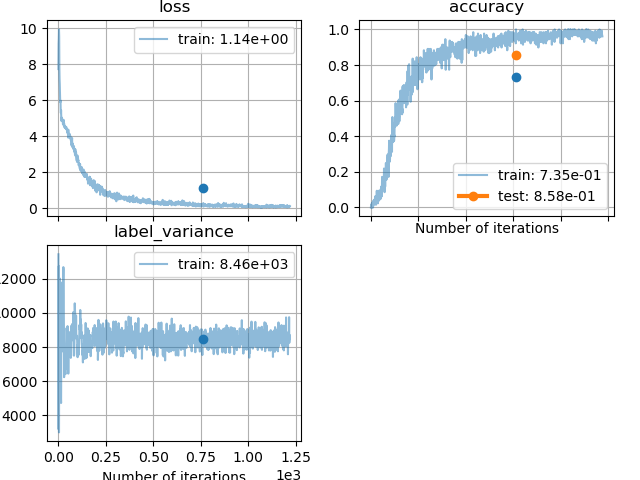

In [21]:
# Create a noggin plot, that keeps track of the metrics: "loss" and "accuracy"
# STUDENT CODE HERE
from noggin import create_plot
plotter, fig, ax = create_plot(metrics=["loss", "accuracy", "label_variance"], ncols = 2)



In [22]:
print(id_to_label_dict[108])
print(id_to_label_dict[44])

print(id_to_label_dict[17])

Potato Red Washed
Grape Blue
Banana Lady Finger


In [23]:
prediction = model(batch)
print(prediction)
print(np.argmax(prediction, axis=1))

Tensor([[ 3.76618692,  0.83857121, -1.20055126, ...,  0.16942896,
          0.49050838,  0.51355534],
        [ 3.38384504, -0.00845496, -0.03656052, ...,  0.17962437,
         -0.17495592, -1.62717477],
        [ 2.99152725,  0.88729139, -0.53814252, ...,  0.49778206,
          0.4061489 , -1.25071805],
        ...,
        [ 4.08569316,  1.10535533, -1.28428326, ...,  0.15005402,
          1.53139386,  0.98732065],
        [ 3.25857338, -0.20950669,  0.02310303, ...,  1.35955844,
          0.66219378, -0.21907693],
        [ 3.65886466,  2.31608455, -0.03958509, ...,  0.00521014,
         -0.35672721,  0.74491325]])
[105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105
 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105
 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105
 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105
 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105
 105 105 

In [25]:
# Set `batch_size = 100`: the number of predictions that we will make in each training step

# STUDENT CODE HERE
batch_size = 128
# We will train for 10 epochs; you can change this if you'd like.
# You will likely want to train for much longer than this
for epoch_cnt in range(1000):
    
    # Create the indices to index into each image of your training data
    # e.g. `array([0, 1, ..., 9999])`, and then shuffle those indices.
    # We will use this to draw random batches of data
    # STUDENT CODE HERE
    indices = np.arange(0, len(fruit_images))
    np.random.shuffle(indices) 
    for batch_cnt in range(0, len(fruit_images) // batch_size):
        # Index into `x_train` to get your batch of M images.
        # Make sure that this is a randomly-sampled batch
        # STUDENT CODE HERE
        
        batch = fruit_images[indices[batch_cnt * batch_size : (batch_cnt + 1) * batch_size]]
        
        # compute the predictions for this batch by calling on model
        # STUDENT CODE HERE
        
        prediction = model(batch)

        # compute the true (a.k.a desired) values for this batch: 
        # STUDENT CODE HERE
        
        truth = label_ids[indices[batch_cnt * batch_size : (batch_cnt + 1) * batch_size]]
        
#         print("prediction")
#         print(np.argmax(prediction, axis=1))
#         print("truth")
#         print(truth)

        # compute the loss associated with our predictions(use softmax_cross_entropy)
        # STUDENT CODE HERE
        
        loss = softmax_cross_entropy(prediction, truth)
#         print("loss")
#         print(loss)
        
        # compute the accuracy between the prediction and the truth 
        # STUDENT CODE HERE
        
        if isinstance(prediction, mg.Tensor):
            prediction = prediction.data
            
        predicted_class = np.argmax(prediction, axis=1)
        
        
        acc = np.mean(predicted_class == truth)

        # back-propagate through your computational graph through your loss
        # STUDENT CODE HERE
        
        loss.backward()
        
        # execute gradient-descent by calling step() of optim
        # STUDENT CODE HERE
        
        optim.step()
        
        # null your gradients
        # STUDENT CODE HERE
        
        loss.null_gradients()

        plotter.set_train_batch({"loss" : loss.item(),
                                 "accuracy" : acc, 
                                 "label_variance" : predicted_class.sum()},
                                 batch_size=batch_size)
    
    # After each epoch we will evaluate how well our model is performing
    # on data from cifar10 *that it has never "seen" before*. This is our
    # "test" data. The measured accuracy of our model here is our best 
    # estimate for how our model will perform in the real world 
    # (on 32x32 RGB images of things in this class)
    test_idxs = np.arange(len(test_fruit_images))
    
    for batch_cnt in range(0, len(test_fruit_images)//batch_size):
        batch_indices = test_idxs[batch_cnt*batch_size : (batch_cnt + 1)*batch_size]
        
        batch = test_fruit_images[batch_indices]
        truth = test_label_ids[batch_indices]
        
        # Get your model's predictions for this test-batch
        # and measure the test-accuracy for this test-batch
        # STUDENT CODE HERE
        
        prediction = model(batch)
        if isinstance(prediction, mg.Tensor):
            prediction = prediction.data
        acc = np.mean(np.argmax(prediction, axis=1) == truth)
        
        # pass your test-accuracy here; we used the name `test_accuracy`
        plotter.set_test_batch({"accuracy" : acc}, batch_size=batch_size)
    plotter.set_train_epoch()
    plotter.set_test_epoch()

KeyboardInterrupt: 

In [ ]:
labels = datasets.load_cifar10.labels  # tuple of cifar-10 labels

index = np.random.randint(0, len(img_test))  # pick a random test-image index

true_label_index = label_test[index]
true_label = labels[true_label_index]

prediction = model(x_test[index:index + 1])  # you must pass in a shape-(1, 3072) array 
predicted_label_index = np.argmax(prediction.data, axis=1).item()  # largest score indicates the prediction
predicted_label = labels[predicted_label_index]


fig, ax = plt.subplots()

# matplotlib wants shape-(H, W, C) images, with unsigned 8bit pixel values
img = img_test[index].transpose(1,2,0).astype('uint8')

ax.imshow(img)
ax.set_title(f"Predicted: {predicted_label}\nTruth: {true_label}");

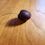

In [55]:
newimg = Image.open("test_cherry.jpg")
newimg

Pear Red


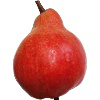

In [50]:
image_path = "test_cherry.jpg"
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

image = cv2.resize(image, (45, 45))
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

test_cherry_image = image
test_cherry_image = np.array(test_cherry_image)
test_cherry_image = test_cherry_image.reshape(1,6075)
prediction = model(test_cherry_image)
print(id_to_label_dict[np.argmax(prediction)])
im = Image.open("fruits-360/Training/Pear Red/0_100.jpg")
im

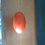

In [57]:
newimg = Image.open("test_tomato.jpg")
newimg

Banana Lady Finger


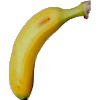

In [52]:
image_path = "test_tomato.jpg"
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

image = cv2.resize(image, (45, 45))
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

test_cherry_image = image
test_cherry_image = np.array(test_cherry_image)
test_cherry_image = test_cherry_image.reshape(1,6075)
prediction = model(test_cherry_image)
print(id_to_label_dict[np.argmax(prediction)])
im = Image.open("fruits-360/Training/Banana Lady Finger/0_100.jpg")
im